# Análise de dados de reembolso dos senadores - 2018

In [1]:
import pandas as pd

In [2]:
# Criando o df com a limpeza de separador, linha, encode, e definindo decimal onde for detectado objeto com número
df = pd.read_csv('2018.csv', sep=';', encoding='latin1', skiprows=1, decimal=',' )

In [3]:
df.SENADOR.value_counts()

EDUARDO LOPES          864
PAULO BAUER            824
WELLINGTON FAGUNDES    800
JOSÉ SERRA             715
GLEISI HOFFMANN        653
                      ... 
ALVARO DIAS             40
FERNANDO COLLOR         27
JADER BARBALHO          19
CRISTOVAM BUARQUE       16
ZÉ SANTANA               8
Name: SENADOR, Length: 91, dtype: int64

In [4]:
df.tail(3)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
24489,2018,12,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",16.979.906/0001-30,Posto Vila da Serra Ltda,401714,19/12/2018,NaN,232.01,2113732
24490,2018,12,ZEZÉ PERRELLA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Adria Viagens e Turismo Ltda,CI5PSK,05/12/2018,"Companhia Aérea: AZUL, Localizador: CI5PSK. Pa...",1132.69,2111612
24491,2018,12,ZEZÉ PERRELLA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Adria Viagens e Turismo Ltda,OHNRAG,17/12/2018,"Companhia Aérea: LATAM, Localizador: OHNRAG. P...",1260.45,2113823


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24492 entries, 0 to 24491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                24492 non-null  int64  
 1   MES                24492 non-null  int64  
 2   SENADOR            24492 non-null  object 
 3   TIPO_DESPESA       24492 non-null  object 
 4   CNPJ_CPF           24492 non-null  object 
 5   FORNECEDOR         24492 non-null  object 
 6   DOCUMENTO          23476 non-null  object 
 7   DATA               24492 non-null  object 
 8   DETALHAMENTO       18882 non-null  object 
 9   VALOR_REEMBOLSADO  24492 non-null  float64
 10  COD_DOCUMENTO      24492 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.1+ MB


In [6]:
# Mudando o tipo da coluna 'VALOR_REEMBOLSADO' para o tipo 'int'
# df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'].str.replace(',', '').astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24492 entries, 0 to 24491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                24492 non-null  int64  
 1   MES                24492 non-null  int64  
 2   SENADOR            24492 non-null  object 
 3   TIPO_DESPESA       24492 non-null  object 
 4   CNPJ_CPF           24492 non-null  object 
 5   FORNECEDOR         24492 non-null  object 
 6   DOCUMENTO          23476 non-null  object 
 7   DATA               24492 non-null  object 
 8   DETALHAMENTO       18882 non-null  object 
 9   VALOR_REEMBOLSADO  24492 non-null  float64
 10  COD_DOCUMENTO      24492 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.1+ MB


In [8]:
df_rem = df.groupby(by='SENADOR')['VALOR_REEMBOLSADO'].sum()

In [9]:
df_rem

SENADOR
ACIR GURGACZ           317797.29
AIRTON SANDOVAL        308350.35
ALVARO DIAS             44037.88
ANA AMÉLIA             147226.50
ANTONIO ANASTASIA      277230.59
                         ...    
WELLINGTON FAGUNDES    417778.67
WILDER MORAIS          159069.64
ZEZÉ PERRELLA          312714.95
ZÉ SANTANA              23300.67
ÂNGELA PORTELA         485806.44
Name: VALOR_REEMBOLSADO, Length: 91, dtype: float64

In [14]:
df2 = pd.read_csv('2021.csv', sep=';', encoding='latin1', skiprows=1, decimal=',' )

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                1945 non-null   int64  
 1   MES                1945 non-null   int64  
 2   SENADOR            1945 non-null   object 
 3   TIPO_DESPESA       1945 non-null   object 
 4   CNPJ_CPF           1945 non-null   object 
 5   FORNECEDOR         1945 non-null   object 
 6   DOCUMENTO          1854 non-null   object 
 7   DATA               1945 non-null   object 
 8   DETALHAMENTO       986 non-null    object 
 9   VALOR_REEMBOLSADO  1945 non-null   float64
 10  COD_DOCUMENTO      1945 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 167.3+ KB


In [17]:
# Quais os 10 senadores que mais pediram reembolso em 2021, até o mês de março?
df2.groupby(by='SENADOR')['VALOR_REEMBOLSADO'].sum().nlargest(10)

SENADOR
TELMÁRIO MOTA       105264.31
MARCIO BITTAR        93130.67
ZEQUINHA MARINHO     88441.03
CIRO NOGUEIRA        84582.71
MAILZA GOMES         77349.34
EDUARDO BRAGA        75000.00
JADER BARBALHO       75000.00
ROGÉRIO CARVALHO     74438.20
ELIZIANE GAMA        71420.41
FERNANDO COLLOR      64000.00
Name: VALOR_REEMBOLSADO, dtype: float64

In [31]:
df2[df2['SENADOR'].str.contains('BOLSONARO')]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
671,2021,1,FLÁVIO BOLSONARO,"Aluguel de imóveis para escritório político, c...",40.432.544/0062-69,Claro S.A,019530448,15/01/2021,NaN,204.99,2156098
672,2021,1,FLÁVIO BOLSONARO,"Aluguel de imóveis para escritório político, c...",60.444.437/0001-46,Light Serviços de Eletricidade SA,0877072,19/01/2021,NaN,90.57,2156105
673,2021,1,FLÁVIO BOLSONARO,"Aluguel de imóveis para escritório político, c...",15.081.898/0001-47,Miranda & Miranda Imoveis Ltda.,NaN,30/12/2020,NaN,1391.72,2154207
674,2021,1,FLÁVIO BOLSONARO,"Aluguel de imóveis para escritório político, c...",15.081.898/0001-47,Miranda & Miranda Imoveis Ltda.,NaN,29/01/2021,NaN,1102.00,2156116
675,2021,1,FLÁVIO BOLSONARO,"Aluguel de imóveis para escritório político, c...",15.081.898/0001-47,Miranda & Miranda Imoveis Ltda.,NaN,29/01/2021,NaN,1500.00,2156112
676,2021,1,FLÁVIO BOLSONARO,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,AZUL,BL2R2U,08/01/2021,"Companhia Aérea: AZUL, Localizador: BL2R2U. Pa...",1032.87,2154565
677,2021,1,FLÁVIO BOLSONARO,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,TAM,IKKRWG,08/01/2021,"Companhia Aérea: TAM, Localizador: IKKRWG. Pas...",2211.94,2154569
678,2021,1,FLÁVIO BOLSONARO,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,TAM,GUWWVU,12/01/2021,"Companhia Aérea: TAM, Localizador: GUWWVU. Pas...",2333.57,2154204
679,2021,1,FLÁVIO BOLSONARO,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,TAM,QIQGGQ,21/01/2021,"Companhia Aérea: TAM, Localizador: QIQGGQ. Pas...",1643.47,2154566


In [41]:
df2_tel = df2[df2['SENADOR'].str.contains('TELMÁRIO')]

In [51]:
df2_tel.sort_values(by='VALOR_REEMBOLSADO', ascending=False)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
1779,2021,2,TELMÁRIO MOTA,"Locomoção, hospedagem, alimentação, combustíve...",287.458.682-04,DAURA DE OLIVEIRA PAIVA,023,22/02/2021,NaN,18000.00,2156129
1758,2021,1,TELMÁRIO MOTA,"Locomoção, hospedagem, alimentação, combustíve...",287.458.682-04,DAURA DE OLIVEIRA PAIVA,22,22/01/2021,NaN,18000.00,2154626
1745,2021,1,TELMÁRIO MOTA,Divulgação da atividade parlamentar,07.343.176/0001-95,GRÁFICA MAXTER LTDA.,00003531,05/01/2021,NaN,13000.00,2154232
1742,2021,1,TELMÁRIO MOTA,Divulgação da atividade parlamentar,07.932.970/0001-74,APTA SERVIÇOS LTDA - ME,1608,05/02/2021,NaN,6000.00,2155197
1790,2021,3,TELMÁRIO MOTA,"Aluguel de imóveis para escritório político, c...",717.750.992-53,HELEN ALICE COSTA DA SILVA,003,01/03/2021,NaN,3100.00,2156765
...,...,...,...,...,...,...,...,...,...,...,...
1765,2021,2,TELMÁRIO MOTA,"Aluguel de imóveis para escritório político, c...",05.939.467/0001-15,COMPANHIA DE ÁGUAS E ESGOTOS DE RORAIMA,S / N,12/02/2021,NaN,42.89,2156124
1796,2021,3,TELMÁRIO MOTA,"Locomoção, hospedagem, alimentação, combustíve...",32.357.271/0001-95,PEIXE NA REDE ASA SUL,69769,05/03/2021,NaN,39.90,2156689
1797,2021,3,TELMÁRIO MOTA,"Locomoção, hospedagem, alimentação, combustíve...",32.357.271/0001-95,PEIXE NA REDE ASA SUL,70178,09/03/2021,NaN,39.90,2156756
1791,2021,3,TELMÁRIO MOTA,"Locomoção, hospedagem, alimentação, combustíve...",27.522.923/0001-60,CASARÃO DA VILA RESTAURANTE LTDA,95999,02/03/2021,NaN,34.90,2156696


In [55]:
# Quais as 50 maiores despesas reembolsadas pelo senador Telmário Mota no ano de 2021
df2_tel.nlargest(50, 'VALOR_REEMBOLSADO')

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
1758,2021,1,TELMÁRIO MOTA,"Locomoção, hospedagem, alimentação, combustíve...",287.458.682-04,DAURA DE OLIVEIRA PAIVA,22,22/01/2021,NaN,18000.00,2154626
1779,2021,2,TELMÁRIO MOTA,"Locomoção, hospedagem, alimentação, combustíve...",287.458.682-04,DAURA DE OLIVEIRA PAIVA,023,22/02/2021,NaN,18000.00,2156129
1745,2021,1,TELMÁRIO MOTA,Divulgação da atividade parlamentar,07.343.176/0001-95,GRÁFICA MAXTER LTDA.,00003531,05/01/2021,NaN,13000.00,2154232
1742,2021,1,TELMÁRIO MOTA,Divulgação da atividade parlamentar,07.932.970/0001-74,APTA SERVIÇOS LTDA - ME,1608,05/02/2021,NaN,6000.00,2155197
1790,2021,3,TELMÁRIO MOTA,"Aluguel de imóveis para escritório político, c...",717.750.992-53,HELEN ALICE COSTA DA SILVA,003,01/03/2021,NaN,3100.00,2156765
1743,2021,1,TELMÁRIO MOTA,Divulgação da atividade parlamentar,04.493.799/0001-56,Buritis Comunicações Ltda,00003984,26/01/2021,NaN,3000.00,2154636
1771,2021,2,TELMÁRIO MOTA,Divulgação da atividade parlamentar,04.493.799/0001-56,Buritis Comunicações Ltda,4008,24/02/2021,NaN,3000.00,2156131
1733,2021,1,TELMÁRIO MOTA,"Aluguel de imóveis para escritório político, c...",717.750.992-53,HELEN ALICE COSTA DA SILVA,001,07/01/2021,NaN,2800.00,2154234
1766,2021,2,TELMÁRIO MOTA,"Aluguel de imóveis para escritório político, c...",717.750.992-53,HELEN ALICE COSTA DA SILVA,002,05/02/2021,NaN,2800.00,2156123
1746,2021,1,TELMÁRIO MOTA,Divulgação da atividade parlamentar,34.806.489/0001-05,Sistema Boa Vista de Comunicações Ltda,00001213,26/01/2021,NaN,2500.00,2154635


In [64]:
# Qual a soma de cada tipo de despesa gasta pelo senador Telmário, ano 2021?
# Cria uma serie do pandas com o 'tipo despesa' e 'valor reembolsado'
piz = df2_tel.groupby(by='TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline


<AxesSubplot:ylabel='VALOR_REEMBOLSADO'>

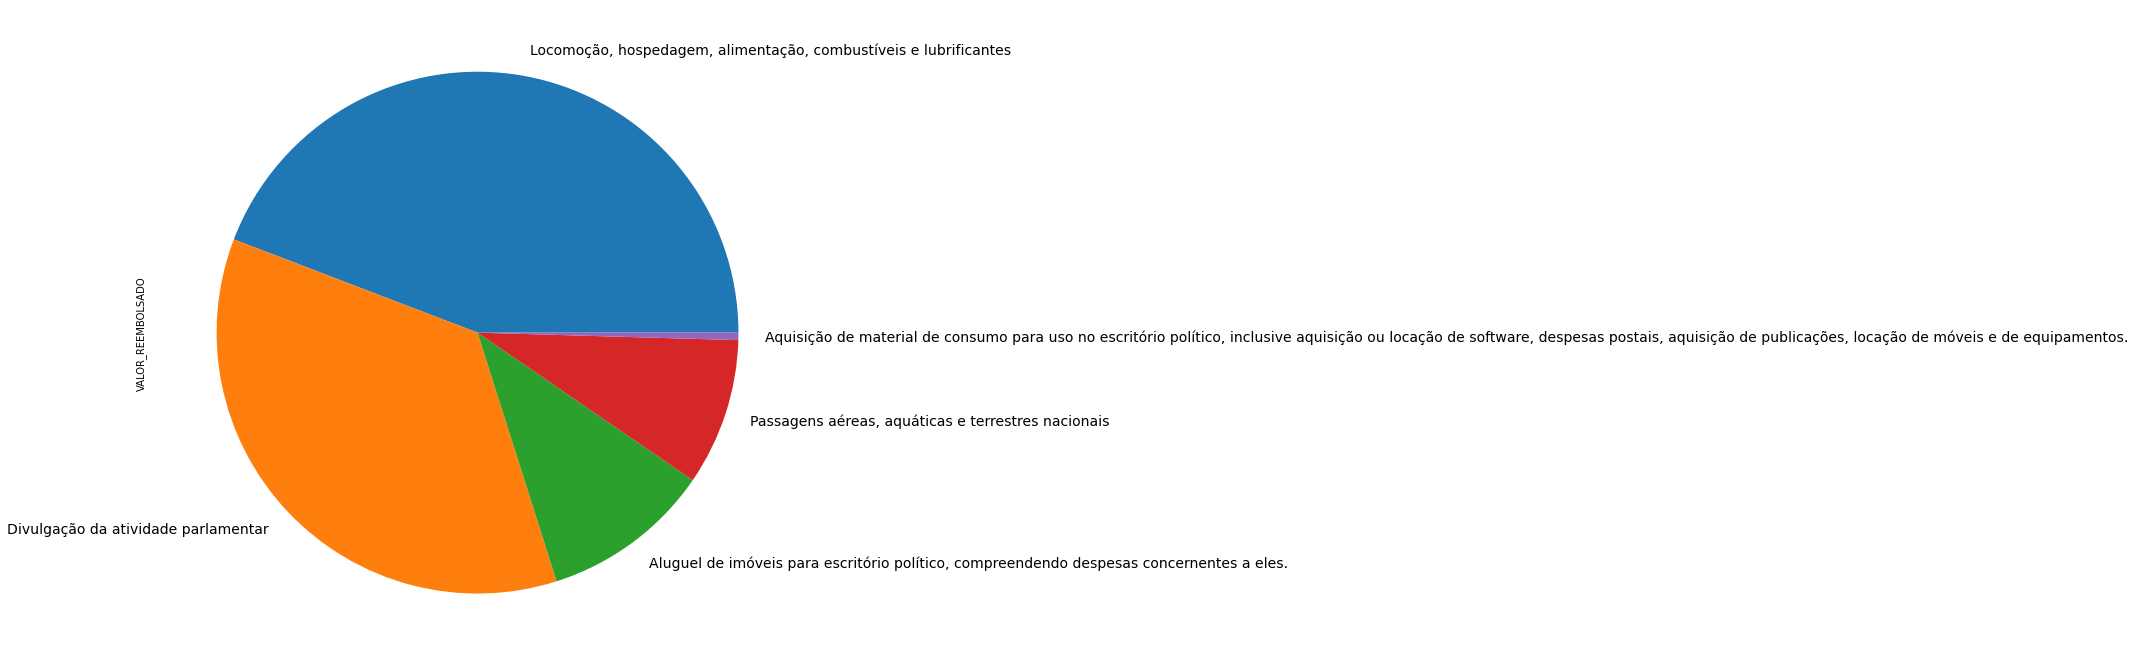

In [89]:
piz.plot.pie(figsize=(12,12), fontsize=14)

In [97]:
# Quais os 5 menores reembolsos de 2021?
df.nsmallest(5, 'VALOR_REEMBOLSADO')

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
3868,2018,5,DÁRIO BERGER,"Passagens aéreas, aquáticas e terrestres nacio...",02.575.829/0001-48,AVIANCA BRASIL,K5RKJV,29/05/2018,"Companhia Aérea: AVIANCA, Localizador: K5RKJV....",0.01,2098074
10161,2018,3,JORGE VIANA,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,LATAM,W4UUE7,21/03/2018,"Companhia Aérea: LATAM, Localizador: W4UUE7. P...",0.01,2093494
10191,2018,4,JORGE VIANA,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,GOL TRANSPORTES AÉREOS S/A,ZHV36P,09/03/2018,"Companhia Aérea: GOL, Localizador: ZHV36P. Pas...",0.01,2093484
10196,2018,4,JORGE VIANA,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,LATAM,W6ZMK3,17/04/2018,"Companhia Aérea: LATAM, Localizador: W6ZMK3. P...",0.01,2112029
10233,2018,5,JORGE VIANA,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,LATAM,OZALEF,22/05/2018,"Companhia Aérea: LATAM, Localizador: OZALEF. P...",0.01,2100068


In [98]:
piz

TIPO_DESPESA
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   46510.05
Divulgação da atividade parlamentar                                                                                                                                                                37600.00
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           11085.37
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                  9587.66
Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis